In [1]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import random;import time, signal

In [2]:
fs=17;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [3]:
# Reload all scans in this round! 
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P3R11/'; 
# Initialize the big dict:
Targets = ["Andrew","Constant","Valoen",] # _int=8e-19_360cyc
Scan_Num = [3,3,3]
Round_P3R11_Long = {}
for target,scan_num in zip(Targets,Scan_Num):
    target_filename = target + '_int=6e-19_2000cyc'
    Round_P3R11_Long[target] = {}
    Scans = np.arange(1,scan_num+1,1).tolist()
    for scan in Scans:
        Round_P3R11_Long[target][str(scan)]={}
        scan_name = str(scan) + 'th Scan'
        try:
            Round_P3R11_Long[target][str(scan)] = loadmat( 
            BasicPath  +   target_filename + "/" + scan_name + "/" 
            + scan_name + "-for_AGE_only.mat")
        except:
            print(f"Nothing in {target_filename}, Scan {scan}")

In [ ]:
my_dict_AGE = Round_P3R11_Long['Andrew'][str(Scan_i)]
T_1 = my_dict_AGE["CD Time [h]"][0]
""" plt.plot(T_1[-1][0],my_dict_AGE["CD X-averaged battery concentration overpotential [V]"][0][-1][0])
plt.plot(T_1[-1][0],my_dict_AGE["CD X-averaged EC concentration overpotential [V]"][0][-1][0])
plt.plot(T_1[-1][0],my_dict_AGE["CD X-averaged battery electrolyte ohmic losses [V]"][0][-1][0])
plt.plot(T_1[-1][0],my_dict_AGE["CD X-averaged battery solid phase ohmic losses [V]"][0][-1][0])
 """
print(my_dict_AGE["LLI to SEI in one CD step [A.h]"][0])
print(my_dict_AGE["Discharge capacity [A.h]"][0])
print(my_dict_AGE["LLI to SEI in one CD step [A.h]"][0]/my_dict_AGE["Discharge capacity [A.h]"][0])

[1.33824994e-05 8.47225345e-07 4.46656182e-07 2.89467734e-07
 2.05391026e-07 1.53571512e-07 1.18874103e-07 9.43323073e-08
 7.62825072e-08 6.26119142e-08]
[4.94423279 4.84609053 4.80800324 4.77805615 4.75233774 4.72933997
 4.70829203 4.68873654 4.67037526 4.65300208]
[2.70668878e-06 1.74826562e-07 9.28984777e-08 6.05827402e-08
 4.32189456e-08 3.24720813e-08 2.52478186e-08 2.01189183e-08
 1.63332715e-08 1.34562403e-08]


: 

In [ ]:
my_dict_AGE["LLI to SEI in one CD step [A.h]"][0]+my_dict_AGE["Discharge capacity [A.h]"][0]

array([4.94424618, 4.84609137, 4.80800369, 4.77805644, 4.75233794,
       4.72934012, 4.70829215, 4.68873664, 4.67037533, 4.65300214])

: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

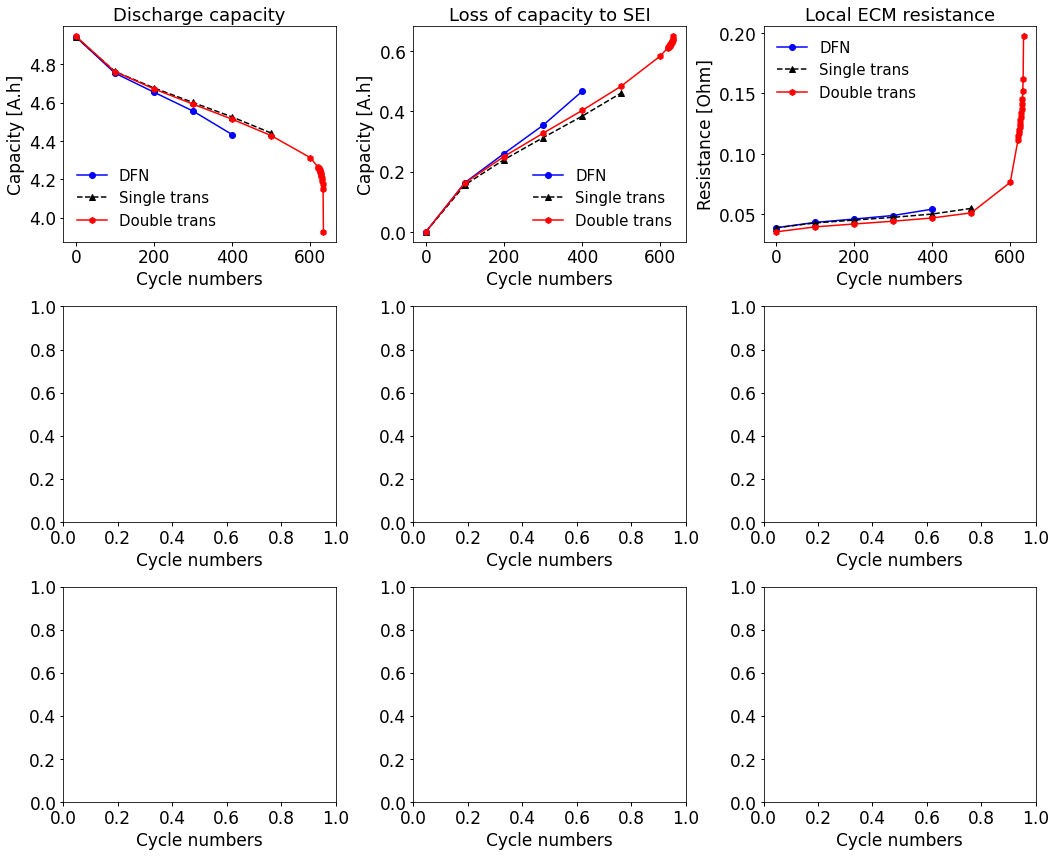

In [11]:
Scans = np.arange(1,4,1).tolist()
Str=[ 'DFN',  'Single trans', 'Double trans' ]
str_para = 'Valoen'   # "Andrew","Constant","Valoen"
Colors = ['b','k','r',];LS = ['-','--','-'];MS=['o','^','h']

fig, axs = plt.subplots(3,3, figsize=(15,12),tight_layout=True)
for Scan_i in range(1,4):
    Full_cycle = Round_P3R11_Long[str_para][str(Scan_i)]['Full_cycle'][0]
    my_dict_AGE = Round_P3R11_Long[str_para][str(Scan_i)]
    axs[0,0].plot(
        Full_cycle, 
        my_dict_AGE["Discharge capacity [A.h]"][0] ,
        color=Colors[Scan_i-1],linestyle=LS[Scan_i-1],
        marker = MS[Scan_i-1],label=Str[Scan_i-1])
    axs[0,0].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0,0].set_title("Discharge capacity",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[0,1].plot(
        Full_cycle, 
        my_dict_AGE["CDend Loss of capacity to SEI [A.h]"][0] ,
        color=Colors[Scan_i-1],linestyle=LS[Scan_i-1],
        marker = MS[Scan_i-1],label=Str[Scan_i-1])
    axs[0,1].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0,1].set_title("Loss of capacity to SEI",   fontdict={'family':'DejaVu Sans','size':fs+1})

    axs[0,2].plot(
        Full_cycle, 
        my_dict_AGE["CDend Local ECM resistance [Ohm]"][0] ,
        color=Colors[Scan_i-1],linestyle=LS[Scan_i-1],
        marker = MS[Scan_i-1],label=Str[Scan_i-1])
    axs[0,2].set_ylabel("Resistance [Ohm]",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[0,2].set_title("Local ECM resistance",   fontdict={'family':'DejaVu Sans','size':fs+1})
    
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  
    axs[0,1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  
    for i in range(0,3):
        for j in range(0,3):
            axs[i,j].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
            
            labels = axs[i,j].get_xticklabels() + axs[i,j].get_yticklabels(); 
            [label.set_fontname('DejaVu Sans') for label in labels]
            axs[i,j].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
            axs[i,j].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)    

: 

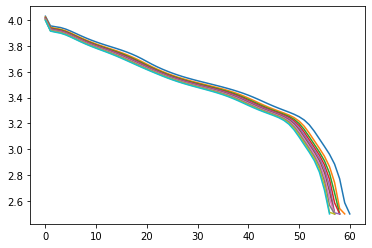

: 

In [ ]:
# ['Andrew', 'Constant', 'Valoen']
# sequence: 'Model_DFN',  'Model_SD', 'Model_DD' 

# access Andrew - Model_DD:
#print(Round_P3R11_Long['Andrew']['3']["CD Terminal voltage [V]"][0])
for vol in Round_P3R11_Long['Andrew']['3']["CD Terminal voltage [V]"][0]:
    plt.plot(vol[0])

In [ ]:
print(Round_P3R11_Long['Andrew']['3']["CD Terminal voltage [V]"][0][2])

[[4.01893805 3.93751139 3.9300011  3.92303821 3.91041373 3.89356823
  3.87509691 3.85677025 3.83946089 3.82345802 3.80869839 3.79491095
  3.78167193 3.76844128 3.7546647  3.73993489 3.72406029 3.70700224
  3.68880501 3.66963818 3.65004921 3.63102089 3.61315515 3.59645342
  3.58083901 3.56632061 3.55290877 3.54054488 3.52909442 3.51837422
  3.50818168 3.49831161 3.48855932 3.47871341 3.46854306 3.4577853
  3.44614076 3.43329185 3.41896394 3.40304329 3.38572043 3.36755432
  3.34934703 3.33185937 3.31553922 3.30039285 3.28596301 3.27125122
  3.25441618 3.23224016 3.20000854 3.15391231 3.09685468 3.03776914
  2.97915262 2.91132094 2.81555433 2.66316617 2.50001   ]]


: 